## First a collection of the Python libraries used to solve this assignment

In [74]:
import re
import pandas as pd
from cleantext import clean
import matplotlib.pyplot as plt

## Part 1: Regular expression warmup 

### (1.a)

In [75]:
# Regular expression pattern
pattern = re.compile(r'([0-9]{2})([0-9]{2})([0-9]{2})-?([0-9]{4})')

# Arbitrary test-string
text = "This is my CPR-number: 123456-7890, and this is your CPR-number:0987654321"

# Matches pattern with test-string
match = re.findall(pattern, text)

# Example
match

[('12', '34', '56', '7890'), ('09', '87', '65', '4321')]

### (1.b)

In [76]:
def cpr_century(cpr:tuple):
    """This function returns the century corresponding to a given CPR-number, based on the year and identifier"""
    # Define year & identifier and typecast to 'int'
    day, month, year, identifier = cpr
    year = int(year)
    identifier = int(identifier)

    # Compare identifier & year to table-information and return corresponding century
    if 1 <= identifier <= 3999:
        return 1900
    
    elif 4000 <= identifier <= 4999:
        if year <= 36:
            return 2000
        else:
            return 1900
        
    elif 5000 <= identifier <= 8999:
        if year <= 57:
            return 2000
        else:
            return 1800
        
    elif 9000 <= identifier <= 9999:
        if year <= 36:
            return 2000
        else:
            return 1900
        
# Example
sample_cpr = ('12', '34', '56', '7890')
cpr_century(sample_cpr)

2000

## Part 2: Processing the FakeNewsCorpus data set

### (2.1) & (2.2)

In [77]:
# Read CSV-file as pandas dataframe
df = pd.read_csv('/Users/askeklausen/Documents/GitHub/Fake-News-Project/news_sample.csv')

# Inspect pandas dataframe - this is just a sample of different ways to inspect the data.
# A combination of these samples gives some indication of how the data is structured.

print(df.columns)   # Shows headers for each column more clearly
print(df.head())    # Shows more data for the 5 first rows in the data - also expandable for a better view
df                  # Shows even more data in a well structured and scrollable way

Index(['Unnamed: 0', 'id', 'domain', 'type', 'url', 'content', 'scraped_at',
       'inserted_at', 'updated_at', 'title', 'authors', 'keywords',
       'meta_keywords', 'meta_description', 'tags', 'summary'],
      dtype='object')
   Unnamed: 0   id                domain        type  \
0           0  141               awm.com  unreliable   
1           1  256     beforeitsnews.com        fake   
2           2  700           cnnnext.com  unreliable   
3           3  768               awm.com  unreliable   
4           4  791  bipartisanreport.com   clickbait   

                                                 url  \
0  http://awm.com/church-congregation-brings-gift...   
1  http://beforeitsnews.com/awakening-start-here/...   
2  http://www.cnnnext.com/video/18526/never-hike-...   
3  http://awm.com/elusive-alien-of-the-sea-caught...   
4  http://bipartisanreport.com/2018/01/21/trumps-...   

                                             content  \
0  Sometimes the power of Christmas wil

,Unnamed: 0,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary
0,0,141,awm.com,unreliable,http://awm.com/church-congregation-brings-gift...,Sometimes the power of Christmas will make you...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Church Congregation Brings Gift to Waitresses ...,Ruth Harris,NaN,[''],NaN,NaN,NaN
1,1,256,beforeitsnews.com,fake,http://beforeitsnews.com/awakening-start-here/...,AWAKENING OF 12 STRANDS of DNA – “Reconnecting...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,AWAKENING OF 12 STRANDS of DNA – “Reconnecting...,Zurich Times,NaN,[''],NaN,NaN,NaN
2,2,700,cnnnext.com,unreliable,http://www.cnnnext.com/video/18526/never-hike-...,Never Hike Alone: A Friday the 13th Fan Film U...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Never Hike Alone - A Friday the 13th Fan Film ...,NaN,NaN,[''],Never Hike Alone: A Friday the 13th Fan Film ...,NaN,NaN
3,3,768,awm.com,unreliable,http://awm.com/elusive-alien-of-the-sea-caught...,"When a rare shark was caught, scientists were ...",2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Elusive ‘Alien Of The Sea ‘ Caught By Scientis...,Alexander Smith,NaN,[''],NaN,NaN,NaN
4,4,791,bipartisanreport.com,clickbait,http://bipartisanreport.com/2018/01/21/trumps-...,Donald Trump has the unnerving ability to abil...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Trump’s Genius Poll Is Complete & The Results ...,Gloria Christie,NaN,[''],NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,39259,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2017/12/priso...,"Prison for Rahm, God’s Work And Many Others\n\...",2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,"Prison for Rahm, God’s Work And Many Others",NaN,NaN,[''],NaN,NaN,NaN
246,246,39468,beforeitsnews.com,fake,http://beforeitsnews.com/diy/2017/11/4-useful-...,4 Useful Items for Your Tiny Home\n\nHeadline:...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,4 Useful Items for Your Tiny Home,Dimitry K,NaN,[''],NaN,NaN,NaN
247,247,39477,www.newsmax.com,NaN,https://www.newsmax.com/politics/michael-hayde...,Former CIA Director Michael Hayden said Thursd...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Michael Hayden: We Should Be 'Frightened' by T...,Todd Beamon,NaN,"['michael hayden', 'sthole countries', 'daca',...",President Donald Trump's reported remarks abou...,"Homeland Security, Trump Administration, Immig...",NaN
248,248,39550,www.newsmax.com,NaN,https://www.newsmax.com/newsfront/antonio-saba...,Antonio Sabato Jr. says Hollywood's liberal el...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Antonio Sabato Jr.: It's Oprah or Bust for Hol...,Bill Hoffmann,NaN,"['antonio sabato jr', 'oprah winfrey', 'presid...",Antonio Sabato Jr. says Hollywood's liberal el...,"Trump Administration, ISIS/Islamic State, News...",NaN


### (2.3)

In [78]:
def clean_data(text):
    """Cleans text by using regular expressions"""

    # Convert text to lower-case
    text = text.lower()

    # Remove multiple whitespace, tabs & newlines
    text = re.sub(r'\s+', ' ', text)

    # Replace dates separated with either '/', '.' or '-' with '<DATE>'
    text = re.sub(r'\b\d{1,2}[/.-]\d{1,2}[/.-]\d{2,4}\b', '<DATE>', text)

    # Replace e-mails with '<EMAIL>'
    text = re.sub(r'\b[a-zA-Z0-9._-]+@[a-zA-Z0-9.-]+\.[a-z|A-Z]{2,}\b', '<EMAIL>', text)

    # Replace URLs with '<URL>'
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '<URL>', text)

    # Replace remaining numbers with '<NUM>'
    text = re.sub(r'\b\d+\b', '<NUM>', text)

    return text

# Example use
sample_text = "The date is 02/23-2024. My email is qkh540@alumni.ku.dk. A website is https://kunet.ku.dk. The time is 16:00"
clean_data(sample_text)


'the date is <DATE>. my email is <EMAIL>. a website is <URL> the time is <NUM>:<NUM>'

### (2.4)

In [79]:
def clean_text(text):
    """Cleans text by using the clean-test library. Supported by a regular expression to deal with dates"""

    # Replace dates separated with either '/', '.' or '-' with '<DATE>'
    text = re.sub(r'\b\d{1,2}[/.-]\d{1,2}[/.-]\d{2,4}\b', '<DATE>', text)

    # Clean module for the rest of the options
    cleaned_text = clean(text,
                         lower=True,                
                         no_line_breaks=True,
                         no_punct=True,       
                         no_emails=True,                         
                         no_urls=True,              
                         no_numbers=True,           
                         replace_with_email="<EMAIL>",       
                         replace_with_url="<URL>",
                         replace_with_number="<NUM>",
                         lang="en"
                         )
    
    # Converts <date>, <email>, <url> & <num> to uppercase
    cleaned_text = cleaned_text.replace("<date>", "<date>".upper())
    cleaned_text = cleaned_text.replace("<email>", "<email>".upper())
    cleaned_text = cleaned_text.replace("<url>", "<url>".upper())
    cleaned_text = cleaned_text.replace("<num>", "<num>".upper())

    return cleaned_text

# Example use on same text as in (2.3)
clean_text(sample_text)

'the date is <DATE> my email is <EMAIL> a website is <URL> the time is <NUM><NUM>'

## Part 3: Descriptive frequency analysis of the data

### (3.1)

In [80]:
# Join all content into one string
raw_text = " ".join(df['content'])

# Split raw_text into list of strings
raw_words = raw_text.split()

# Calculates number of unique words in raw_words
unique_raw_words = len(set(raw_words))

# Applies the clean_data function to every cell in the content column
df['cleaned'] = df['content'].apply(lambda x: clean_text(x))

# Join all the cleaned content to a string
cleaned_text = " ".join(df['cleaned'])

# Split cleaned_text into list of strings
cleaned_words = cleaned_text.split()

# Calculates number os unique words in cleaned_words
unique_cleaned_words = len(set(cleaned_words))

# Prints number of unique words in raw data & number of unique words in cleaned data
print(unique_raw_words)
print(unique_cleaned_words)

30005
16673


### (3.2)

In [81]:
# Initialize empty dictonary to store raw words frequencies
raw_word_frequence = {}

# Loop to count frequency of unique words in raw data
for word in raw_words:
    if word in raw_word_frequence:
        raw_word_frequence[word] += 1
    else:
        raw_word_frequence[word] = 1

# Sort frequency-count of raw words in descending order 
sorted_raw_word_frequency = sorted(raw_word_frequence.items(), key=lambda x:x[1], reverse=True)

# Filter top 50 raw words
top_raw_words = sorted_raw_word_frequency[:50]


# Initialize empty dictionary to store cleaned words frequencies
cleaned_word_frequency = {}

# Loop to count frequency of unique words in cleaned data
for word in cleaned_words:
    if word in cleaned_word_frequency:
        cleaned_word_frequency[word] += 1
    else:
        cleaned_word_frequency[word] = 1

# Sort frequency-count of cleaned words in descending order
sorted_cleaned_word_frequency = sorted(cleaned_word_frequency.items(), key=lambda x:x[1], reverse=True)

# Filter top 50 cleaned words
top_cleaned_words = sorted_cleaned_word_frequency[:50]

# Prints top 50 words and corresponding amount in raw data and cleaned data
print(top_raw_words)
print(top_cleaned_words)

[('the', 8244), ('of', 4826), ('to', 4722), ('and', 4414), ('a', 3141), ('in', 2740), ('is', 2193), ('that', 2014), ('for', 1402), ('with', 1059), ('on', 1055), ('are', 1049), ('The', 1044), ('as', 960), ('it', 914), ('you', 898), ('be', 877), ('I', 804), ('this', 788), ('by', 767), ('was', 765), ('have', 762), ('not', 678), ('from', 668), ('or', 644), ('at', 610), ('has', 534), ('your', 524), ('an', 502), ('their', 488), ('they', 483), ('will', 469), ('about', 420), ('can', 419), ('we', 412), ('more', 406), ('but', 391), ('who', 383), ('all', 383), ('–', 362), ('which', 361), ('were', 353), ('been', 342), ('his', 328), ('our', 327), ('one', 327), ('what', 316), ('he', 311), ('would', 311), ('its', 291)]
[('the', 9487), ('of', 4965), ('to', 4888), ('and', 4697), ('a', 3379), ('in', 3108), ('is', 2317), ('that', 2203), ('<NUM>', 1785), ('for', 1552), ('it', 1344), ('are', 1233), ('on', 1162), ('with', 1159), ('this', 1151), ('you', 1141), ('as', 1088), ('be', 925), ('i', 869), ('by', 83

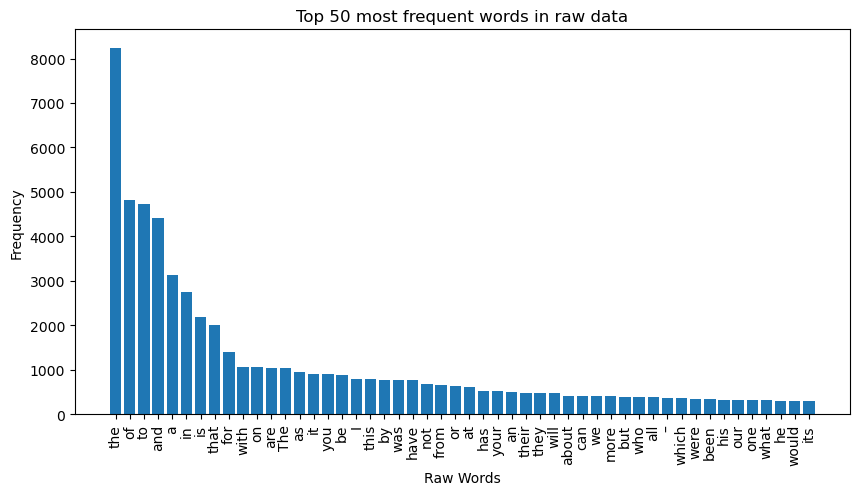

In [82]:
# Extract raw-words and their frequencies from top 50 raw words
raw_words, raw_frequencies = zip(*top_raw_words)

# Plot top 50 raw words by the x-aksis, and their frequencies at the y-aksis
plt.figure(figsize=(10, 5))
plt.bar(raw_words, raw_frequencies)
plt.xlabel('Raw Words')
plt.ylabel('Frequency')
plt.title('Top 50 most frequent words in raw data')
plt.xticks(rotation=90)
plt.show()

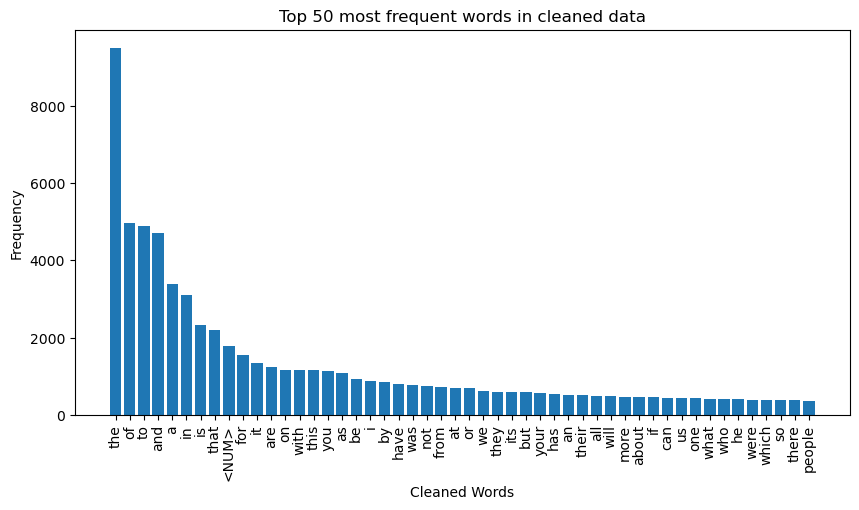

In [83]:
# Extract cleaned words and their frequencis from top 50 cleaned words
clean_words, clean_words_frequency = zip(*top_cleaned_words)

# Plot top 50 cleaned words by the x-aksis, and their frequencies by the y-aksis
plt.figure(figsize=(10, 5))
plt.bar(clean_words, clean_words_frequency)
plt.xlabel('Cleaned Words')
plt.ylabel('Frequency')
plt.title('Top 50 most frequent words in cleaned data')
plt.xticks(rotation=90)
plt.show()